# Generating the PRN's

In [81]:
class tauseworthe_gen:
    def __init__(self, given_bits, r, q):
        self.given_bits = given_bits
        self.r = r
        self.q = q

    def XOR(b_ir,b_iq):
        if((b_ir=='0'and b_iq=='0') or ((b_ir=='1'and b_iq=='1'))):
            return '0'
        if ((b_ir=='1' and b_iq=='0') or ((b_ir=='0' and b_iq=='1'))):
            return '1'
 
    def next_bit_func(self):
        last_bit = len(self.given_bits) - 1
        next_bit = tauseworthe_gen.XOR(self.given_bits[last_bit - self.r], self.given_bits[last_bit - self.q])
        self.given_bits += next_bit
            
    def convert(self, l):
        bit_intervals=[]
        for i in range(0, len(self.given_bits), l): 
            bit_intervals.append(self.given_bits[i:i+l])
        return bit_intervals
           
    def gnr_unif(self, bit_intervals,l):
        unf_num_lst = []
        denom = 2**l
        for bits in bit_intervals:
            temp_num = int(bits,2)/denom
            unf_num_lst.append(temp_num)
        return unf_num_lst

In [82]:
t_bit = tauseworthe_gen('1011100010101000100001110001000010001000010111111000100100100010010100', r = 20, q = 30)

for i in range(100000):
    t_bit.next_bit_func()  
intervals = t_bit.convert(l = 16)
taus_unif = t_bit.gnr_unif(intervals,l=16)

In [83]:
taus_unif

[0.7213134765625,
 0.527587890625,
 0.5326995849609375,
 0.535675048828125,
 0.316253662109375,
 0.0029754638671875,
 0.069976806640625,
 0.0977935791015625,
 0.44964599609375,
 0.474761962890625,
 0.02325439453125,
 0.6376190185546875,
 0.683349609375,
 0.60546875,
 0.8485260009765625,
 0.1905517578125,
 0.48419189453125,
 0.1340179443359375,
 0.339752197265625,
 0.2428131103515625,
 0.4844512939453125,
 0.217559814453125,
 0.8191986083984375,
 0.9761962890625,
 0.11181640625,
 0.7000274658203125,
 0.2376708984375,
 0.81072998046875,
 0.7492218017578125,
 0.9800872802734375,
 0.06365966796875,
 0.80194091796875,
 0.2771453857421875,
 0.9714202880859375,
 0.070831298828125,
 0.5383148193359375,
 0.1876678466796875,
 0.414520263671875,
 0.231536865234375,
 0.148040771484375,
 0.2798309326171875,
 0.4763336181640625,
 0.5802154541015625,
 0.4971771240234375,
 0.3863525390625,
 0.7718658447265625,
 0.5155792236328125,
 0.27801513671875,
 0.9287567138671875,
 0.9109954833984375,
 0.7687683

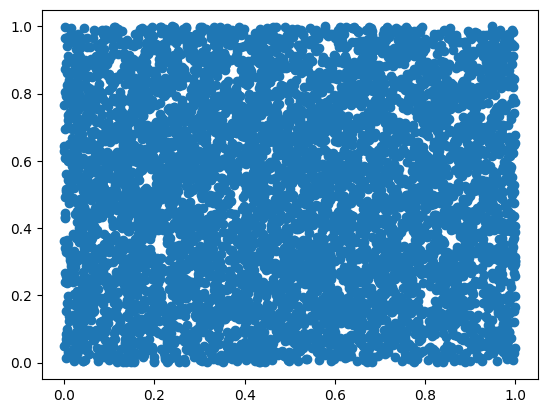

In [84]:
import matplotlib.pyplot as plt
import numpy as np
def plot_prn(prn_list):
    x_pnt = []
    adj_pnt = []
    for i in range(len(prn_list)-1):
        x_pnt.append(prn_list[i])
        adj_pnt.append(prn_list[i+1])
        
    plt.scatter(x_pnt, adj_pnt)
    plt.show()
plot_prn(taus_unif)

# Uniform Tests

In [98]:
from scipy.stats import norm
from scipy.stats import chi2

def gof_test_chi(bin_number, taus_unif, alpha):
    intervals = []
    for i in range(bin_number):
        ran = (i/bin_number, (i+1)/bin_number)
        intervals.append(ran)
    print("Intervals:{}".format(intervals))

    bin_len = len(taus_unif)/bin_number
    
    k_dic = dict()
    for i in range(bin_number):
        k_dic[i] = 0
    for num in taus_unif:        
        for i,val in enumerate(intervals):
            if (num >= val[0] and num < val[1]):
                k_dic[i] += 1

    bin_lst = []
    for b in k_dic:
        bin_lst.append(k_dic[b])

 
    chi_2 = 0
    for i in bin_lst:
        chi_2 += ((i - bin_len)**2)/bin_len

    print("Computed chi-squared test statistic = {}".format(chi_2))
     
    chi_lim = chi2.ppf(1-alpha, bin_number-1)
    print("chi-squared value at {} alpha level = {}" .format(alpha, chi_lim))
    
    
    if chi_2 > chi_lim:
        print("H0 Rejected")
    
    else:
        print("Failed to reject H0/Null")


In [99]:
gof_test_chi(5, taus_unif, alpha = 0.01)

Intervals:[(0.0, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, 1.0)]
Computed chi-squared test statistic = 2.751398880895284
chi-squared value at 0.01 alpha level = 13.276704135987622
Failed to reject H0/Null


In [100]:
gof_test_chi(5, taus_unif, alpha = 0.05)

Intervals:[(0.0, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, 1.0)]
Computed chi-squared test statistic = 2.751398880895284
chi-squared value at 0.05 alpha level = 9.487729036781154
Failed to reject H0/Null


In [101]:
def above_below_mean(taus_unif, alpha):
    signs = []
    higher = 0
    lower = 0
    for val in taus_unif:
        if val >= 0.5:
            signs.append('+')
            higher += 1
        else:
            signs.append('-')
            lower += 1
    runs = 1
    for i in range(len(signs)-2):
        if signs[i] != signs[i+1]:
            runs += 1
    print("Number of runs = {}".format(runs))

    mu = ((2*higher*lower)/len(taus_unif)) + 0.5
    var = (2*higher*lower*(2*higher*lower - len(taus_unif)))/((len(taus_unif) - 1)*len(taus_unif)**2)

    z_0 = (runs - mu) / np.sqrt(var)

    if np.abs(z_0) < norm.ppf(1 - alpha/2):
        print("Failed to reject independence hypothesis")

    else:
        print("Rejected independence hypothesis")
    
    


above_below_mean(taus_unif, 0.05)

Number of runs = 3153
Failed to reject independence hypothesis


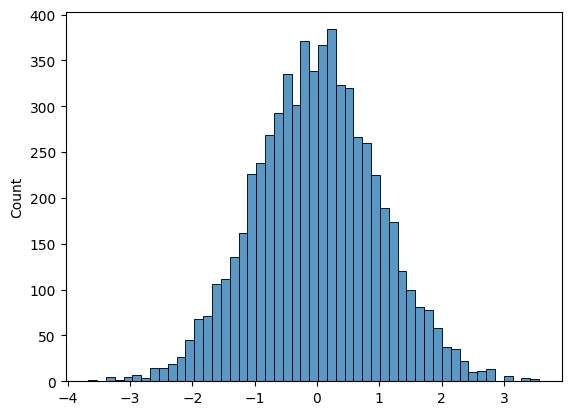

In [102]:
import seaborn as sns

norm_var = []
for ele in taus_unif:
    norm_var.append(norm.ppf(ele))

sns.histplot(norm_var)
plt.show()

In [103]:

from scipy.stats import anderson 
anderson(norm_var)

AndersonResult(statistic=0.3010648256440618, critical_values=array([0.576, 0.656, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [104]:
from scipy.stats import kstest


kstest(taus_unif, 'uniform', args=(0, 1))

KstestResult(statistic=0.010094726952812771, pvalue=0.5433701850470433)

In [105]:
kstest(norm_var, 'norm')

KstestResult(statistic=0.010094726952812771, pvalue=0.5433701850470433)


# Generating Norm(0,1) using Box Muller Algorithm

In [93]:
import numpy as np
def box_muller_uniform_to_normal(u1, u2):
    z1 = np.sqrt(-2.0*np.log(u1))*np.cos(2*np.pi*u2)
    z2 = np.sqrt(-2.0*np.log(u1))*np.sin(2*np.pi*u2)
    return z1, z2


In [94]:
def box_muller_uniform_to_normal_list(u_list):
    n = len(u_list)
    z_list = []
    for i in range(0, n, 2):
        u1 = u_list[i]
        u2 = u_list[i + 1] if i + 1 < n else np.random.rand() 
        z1, z2 = box_muller_uniform_to_normal(u1, u2)
        z_list.extend([z1, z2])
    return z_list


normal_variates = box_muller_uniform_to_normal_list(taus_unif)

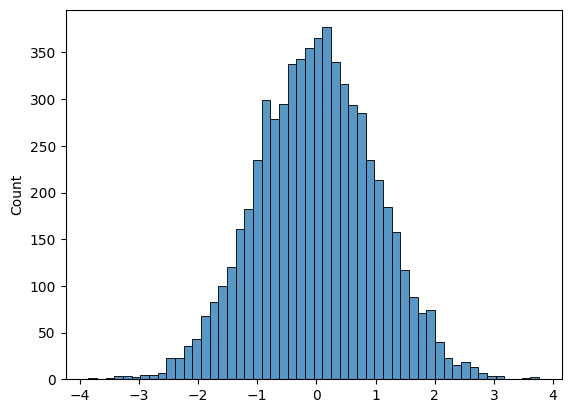

In [95]:
sns.histplot(normal_variates)
plt.show()

# Independence Tests

In [106]:
def ac_test(taus_list, alpha):
    n = len(taus_list)
    temp = 0
    for i in range(n-2):
        temp += taus_list[i]*taus_list[i+1]

    val1 = ((12/(n-1))*temp) - 3 
    val2 = (13*n - 19)/((n-1)**2)

    z0 = val1/np.sqrt(val2)

    if np.abs(z0) < norm.ppf(1 - alpha/2):
        print("Failed to reject independence hypothesis")

    else:
        print("Rejected Independence Hypothesis")
    
ac_test(taus_unif, 0.05)

Failed to reject independence hypothesis


In [107]:
def above_below_mean(taus_unif, alpha):
    signs = []
    higher = 0
    lower = 0
    for val in taus_unif:
        if val >= 0.5:
            signs.append('+')
            higher += 1
        else:
            signs.append('-')
            lower += 1
    runs = 1
    for i in range(len(signs) - 2):
        if signs[i] != signs[i+1]:
            runs += 1
    print("Number of runs = {}".format(runs))

    mu = ((2*higher*lower)/len(taus_unif)) + 0.5
    var = (2*higher*lower*(2*higher*lower - len(taus_unif)))/((len(taus_unif) - 1)*len(taus_unif)**2)

    z_0 = (runs - mu) / np.sqrt(var)

    if np.abs(z_0) < norm.ppf(1 - alpha/2):
        print("Failed to reject independence hypothesis")

    else:
        print("Rejected independence hypothesis")
    
    


above_below_mean(taus_unif, 0.05)

Number of runs = 3153
Failed to reject independence hypothesis


# Testing with different inputs

In [74]:
if __name__ == "__main__":
    initial_bits=input("Please enter initial bits:")
    r_val=input("Please enter r value:")
    q_val=input("Please enter q value:")
    l_val=input("Please enter l value:")
   
    t_bit = tauseworthe_gen(initial_bits, r = int(r_val), q = int(q_val))

    for i in range(100000):
        t_bit.next_bit_func()  
    intervals = t_bit.convert(l = int(l_val))
    taus_unif = t_bit.gnr_unif(intervals,l=int(l_val))

Please enter initial bits:1100111000011100010001110001111
Please enter r value:15
Please enter q value:30
Please enter l value:16


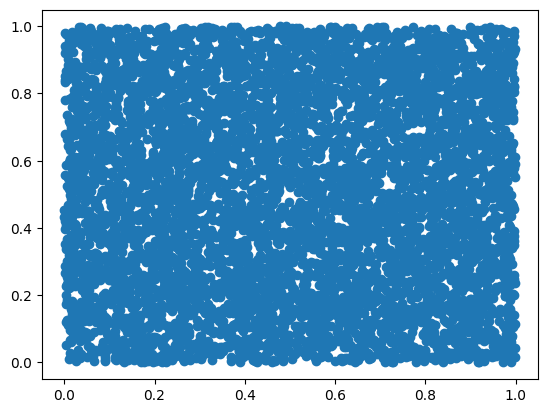

In [75]:
plot_prn(taus_unif)

In [76]:
gof_test_chi(5, taus_unif, alpha = 0.01)


Intervals:[(0.0, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, 1.0)]
Computed chi-squared test statistic = 3.9069097888675617
chi-squared value at 0.01 alpha level = 13.276704135987622
Failed to reject H0/Null


In [77]:
gof_test_chi(5, taus_unif, alpha = 0.05)

Intervals:[(0.0, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, 1.0)]
Computed chi-squared test statistic = 3.9069097888675617
chi-squared value at 0.05 alpha level = 9.487729036781154
Failed to reject H0/Null


In [78]:
above_below_mean(taus_unif, 0.05)

Number of runs = 3166
Failed to reject independence hypothesis


In [79]:
ac_test(taus_unif, 0.05)

Failed to reject independence hypothesis
